## Lesson 06 Demo

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf


In [3]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Checks for Linear Regression. It works best when: 

1. The data is normally distributed (but doesn’t have to be)
2. X’s are independent of each other (low multicollinearity)
3. X’s significantly explain y (have low p-values)


## Check 1. Distribution

#### Last time we plotted our data like this

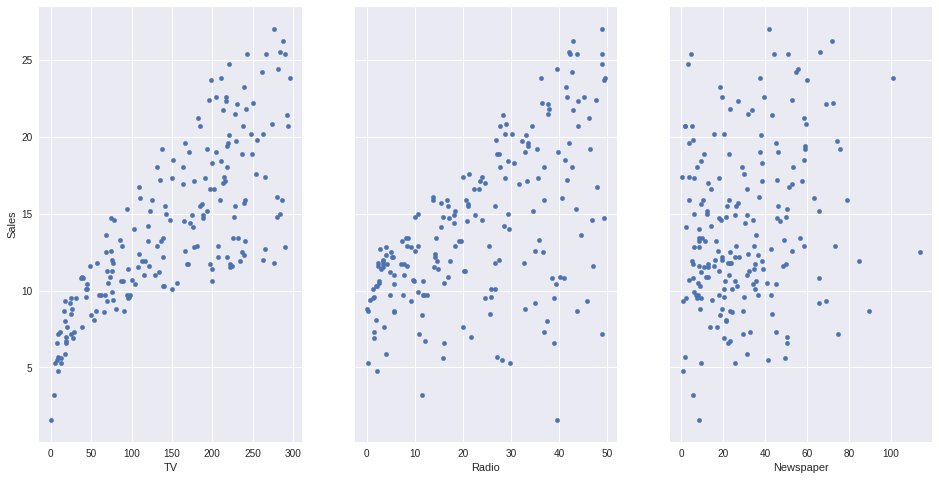

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

### Seaborn plotting library 
https://stanford.edu/~mwaskom/software/seaborn/index.html

Today we use lmplot https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html


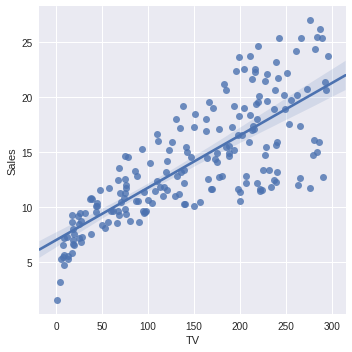

In [5]:
sns.lmplot('TV', 'Sales', data)


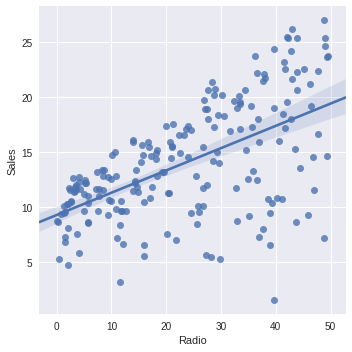

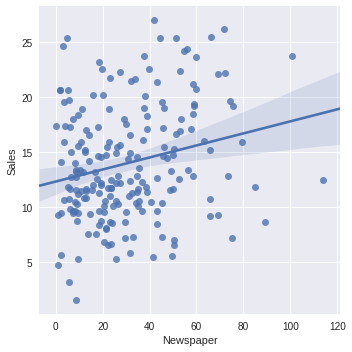

In [6]:
sns.lmplot('Radio', 'Sales', data)
sns.lmplot('Newspaper', 'Sales', data)

## Check 2. Low Multicollinearity

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000
Axes(0.125,0.125;0.62x0.755)


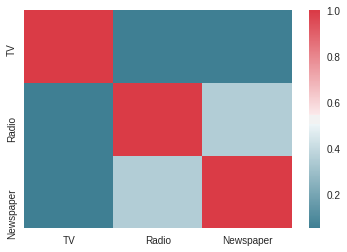

In [7]:
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.light_palette(220, 10, as_cmap=True)

correlations = data[['TV', 'Radio', 'Newspaper']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### Student question: 
1. Do these variables have colinearity? 

Answer:

I would answer with "no". Correlation < 0.5 is considered low in the stats book next to me, Here we are way below **0.1**.

## Check 3: X’s significantly explain y (have low p-values)

#### Let's take a look again the the crude model

In [8]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 15 Jul 2017   Prob (F-statistic):           1.47e-42
Time:                        11:45:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Student Model
#### Now do a full model with TV, Radio and Newspaper
syntax can be found here: http://statsmodels.sourceforge.net/devel/example_formulas.html

In [11]:
#fit model
lm_all = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

#print summary
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 15 Jul 2017   Prob (F-statistic):           1.58e-96
Time:                        11:49:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1. Which of the media buys were significantly associated with the sales? 

Answer:

TV with "0.0458" coef

#### 2. Controlling for all the other media buys, which media type had the largest association with sales?

Answer: 

Radio.

#### 3. Given that one of the variables above was not significant do we drop it from our model? Why or why not? 

Answer: 

Yes: Focus on most important ones, so the non-significant can be pruned out.

No: For some reason we want as much information as possible.